In [42]:
include("tsp_ga.jl")
using Statistics: std, mean, median

In [16]:
x = [3 2 12 7  9  3 16 11 9 2];
y = [1 4 2 4.5 9 1.5 11 8 10 7];

### Example run:

Indiv([10, 5, 9, 8, 7, 3, 4, 1, 6, 2], 43.886171964352165)

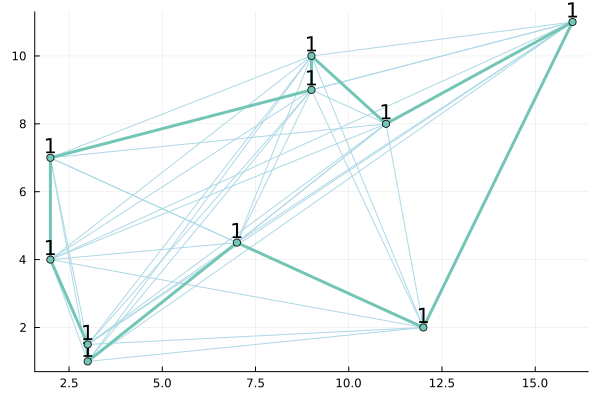

In [3]:
data = [x,y]
best = EvolutionAlgorithm(data, 100, 10^-5, 0.2, 0.8)
display(best[1][1])
visualize_graph(data, best[1][1])

### P = 100, epsilon = 10^(-5), Pm = 0.2, Pc = 0.8

In [43]:
data = [x,y]
ten_best_iter = Vector{Indiv}(undef, 10)
for i in 1:10
    best = EvolutionAlgorithm(
        data,
        population_quantity=100,
        epsilon=10^(-5),
        mutation_probability=0.2,
        crossover_probability=0.8
    )
    ten_best_iter[i] = best[1][1]
end

display(ten_best_iter)
distances = [i.fit for i in ten_best_iter]
display("Standard deviation: $(std(distances))")
display("Mean: $(mean(distances))")
display("Median $(median(distances))")


10-element Vector{Indiv}:
 Indiv([4, 3, 7, 8, 9, 5, 10, 2, 6, 1], 43.886171964352165)
  Indiv([5, 10, 2, 1, 6, 4, 3, 8, 7, 9], 44.51733973020736)
 Indiv([10, 2, 6, 1, 4, 3, 7, 8, 9, 5], 43.886171964352165)
  Indiv([6, 3, 7, 9, 5, 8, 4, 10, 2, 1], 46.73739229010652)
  Indiv([3, 7, 8, 5, 9, 10, 2, 6, 1, 4], 43.62947603368915)
  Indiv([3, 7, 8, 5, 9, 10, 1, 6, 2, 4], 46.42210346818049)
  Indiv([1, 4, 3, 8, 7, 9, 5, 10, 2, 6], 44.36271737997356)
  Indiv([1, 4, 3, 7, 8, 5, 9, 10, 2, 6], 43.62947603368915)
  Indiv([6, 2, 10, 5, 9, 7, 8, 3, 4, 1], 44.36271737997357)
  Indiv([8, 7, 9, 10, 2, 1, 6, 3, 4, 5], 48.94461548355035)

"Standard deviation: 1.7597258718687998"

"Mean: 45.03781817280745"

"Median 44.36271737997356"

In [49]:
data = [x,y]

pms = [0.1 0.2  0.3 0.4]
pcs = [0.9 0.8 0.7 0.6]
Ps = [100 250 350 500 1000]

ten_best_iter = Vector{Indiv}(undef, 10)

open("report.txt", "w+") do f
    for p_m in pms
        for p_c in pcs
            for P in Ps
                ten_best_iter = Vector{Indiv}(undef, 10)
                for i in 1:10
                    best = EvolutionAlgorithm(
                        data,
                        population_quantity=P,
                        epsilon=10^(-5),
                        mutation_probability=p_m,
                        crossover_probability=p_c
                    )
                    ten_best_iter[i] = best[1][1]
                end

                write(f, "\nPopulation quantity: $P\nMutation probability: $p_m\nCrossover probability: $p_c\n\n")

                for individual in ten_best_iter
                    write(f, "$(individual)\n")
                end
        
                distances = [info.fit for info in ten_best_iter]
                write(f, "\nStandard deviation: $(std(distances))\nMean: $(mean(distances))\nMedian $(median(distances))\n\n")
            end
        end
    end
end
